In [1]:
import tsGAN
import Util

import os
import pandas as pd
import numpy as np
import torch

import matplotlib.pyplot as plt
import seaborn as sns

/home/enishiwaki/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sns.set_style('white')
sns.set_context('talk')

In [3]:
# CSV path
folder_name = "data"
file_name = "hungary_chickenpox.csv"
path = os.path.join(folder_name, file_name)
#Load CSV into Dataframe
df = pd.read_csv(path,sep=',')

In [4]:
# Get column names
names = Util.get_column_names(df)

In [19]:
df.keys()

Index(['Date', 'BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD',
       'FEJER', 'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST',
       'SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA'],
      dtype='object')

Text(1284.575980392157, 0.5, 'Bacs Chicken Pox Cases')

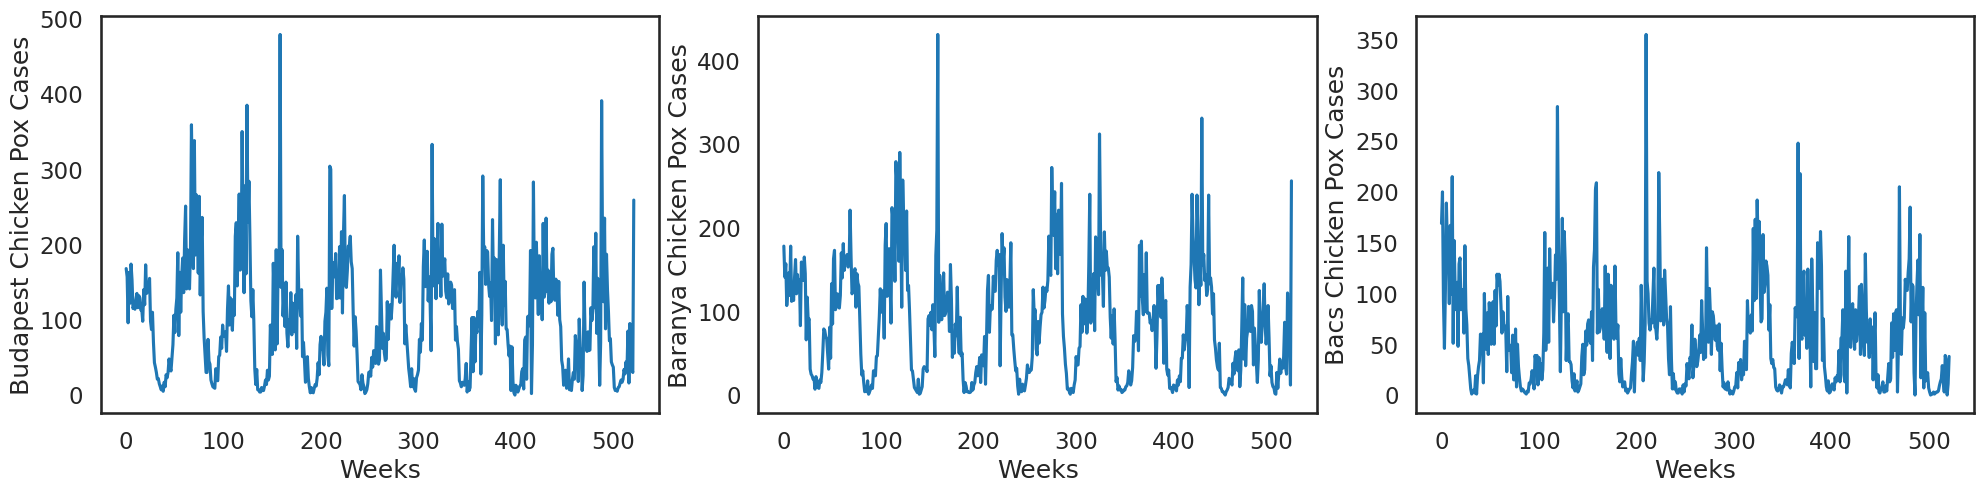

In [22]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
fig.tight_layout()

sns.lineplot(data=df,x=df.index,y='BUDAPEST',ax=axes[0])
axes[0].set_xticks(np.arange(0,550,100))
axes[0].set_xlabel('Weeks')
axes[0].set_ylabel('Chicken Pox Cases')

sns.lineplot(data=df,x=df.index,y='PEST',ax=axes[1])
axes[1].set_xticks(np.arange(0,550,100))
axes[1].set_xlabel('Weeks')
axes[1].set_ylabel('Chicken Pox Cases')

sns.lineplot(data=df,x=df.index,y='BORSOD',ax=axes[2])
axes[2].set_xticks(np.arange(0,550,100))
axes[2].set_xlabel('Weeks')
axes[2].set_ylabel('Chicken Pox Cases')

In [5]:
# Set random state
torch.manual_seed(111)
# Select # of data points from data set to train GAN
num_data = 450
# Specify Validation Data
val_data = 50
# Specify dimensionality of dataframe
df_dim = len(df.columns)
# learning rate
lr = 0.002
# number of epoch
num_epochs = 1000
# Discriminator and Generator dropout fro data standardization
drop_out=0.3
# Define batch size for the data loader
batch_size = 25


# These create the arrays and then turns them into tensors for the train loader 
arrays = Util.create_arrays(df[:num_data],num_data)
train_set = Util.create_tensors(arrays)
# val set
val_arrays = Util.create_arrays(df[num_data:],val_data)
val_set = Util.create_tensors(val_arrays)
# Define discriminator and generator for training function
discriminator = Discriminator(df_dim=df_dim, batch_size=batch_size, drop_out=drop_out)
generator = Generator(df_dim=df_dim, batch_size=batch_size)

In [6]:
# The train loader loads the data into the neural network trainer
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size)

In [7]:
# This takes the trining dataframe as input
# training_loop(num_epochs, train_loader, lr)
# This takes the entire dataframe as input (Val Data Only)
training_loop(num_epochs=num_epochs, train_loader=train_loader, val_loader=val_loader, df_dim=df_dim, batch_size=batch_size, drop_out=drop_out, lr=lr, early_stopping_patience=10)

TypeError: Generator.__init__() got multiple values for argument 'df_dim'